
Title: Gradient Boosting Regressor for Property Prediction
=======
- Created: 2019.11.06
- Updated: 2019.11.23
- Author: Kyung Min, Lee

Learned from 
- "Chapter 2 of Hands-on Machine Learning Book"
- Sckit-Learn documents
  -https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- https://subinium.github.io/introduction-to-ensemble-2-boosting/
- greedy algorithm:https://janghw.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-Greedy-Algorithm-%ED%83%90%EC%9A%95-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98
- https://3months.tistory.com/368
- https://4four.us/article/2017/05/gradient-boosting-simply
- https://wikidocs.net/19037
- visualization: http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html
- https://soobarkbar.tistory.com/41
- "Stochastic Gradient Boosting" paper of Jerome Friedman


## GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.
> class sklearn.ensemble.GradientBoostingRegressor(loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)[source]

- AdaBoost와 같은 순서로 진행합니다. 단 모델의 가중치(D)를 계산하는 방식에서 Gradient Descent를 이용하여 파라미터를 구합니다.

- AdaBoost에서는 모델 가중치를 고려한 선형합으로 최종 predictions을 구합니다. 그렇다면 이 모델 가중치 선형 합 연산을 하나의 식으로 본다면 어떨까요? 모델에 따른 최적의 가중치를 Gradient decent로 구해서 보다 최적화된 결과를 얻고자 하는 것이 GBM의 특징입니다.



### Gradient Boosting 
- - -
- Gradient Descent는 손실함수를 파라미터로 미분해서 기울기를 구하고, 값이 작아지는 방향으로 파라미터를 움직이다 보면 손실함수가 최소화되는 지점에 도딜한다. 이 과정을 함수공간에서 진행한다. 그래서 손실함수를 파라미터가 아니라 현재까지 학습된 모델 함수로 미분한다.

$$ f_{i+1} = f_i + \rho \frac{\partial J}{\partial f_i} $$

- 파라미터 공간에서는 계산된 기울기를 따라서 학습률(Learning Rate, ρ)에 맞춰 θ를 업데이트하면 된다.

- Gradient Boosting은 이 미분값을 다음 모델(Weak Learner)의 타겟으로 넘긴다. Squared Error를 쓰는 경우를 예로 들면, 현재 모델의 잔차를 타겟으로 놓고 새로운 모델 피팅을 한다. 기존 모델은 이 새로운 모델을 흡수해서 Bias를 줄인다. 그리고 다시 잔차를 구하고 모델을 피팅해서 더하기를 반복한다. 매우 단순하고 직관적인 방법인데, 이걸 손실함수를 L2로 설정한 Gradient Boosting으로 설명할 수 있다.

-  Gradient Boosting에서는 Gradient가 현재까지 학습된 모델의 약점을 드러내는 역할을 하고, 다른 모델이 그걸 중점적으로 보완해서 성능을 Boosting한다. 위에서는 L2 손실함수를 썼지만 미분만 가능하다면 다른 손실함수도 얼마든지 쓸 수 있다는 것이 장점이다. 

- 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할 수 있다. 이런 문제에 강인한 L1 Loss나 Huber Loss를 쓰고자 한다면 그냥 손실함수만 교체하면 된다. 손실함수의 특성은 Gradient를 통해 자연스럽게 학습에 반영된다.



![example](https://wikidocs.net/images/page/19037/tree_O9zyAlk.png)
ex) 앙상블 모델의 예측값 ui는 각 트리의 결과를 가중 합산해서 계산할 수 있다. (여기서 Tj(xi)는 트리 j가 xi를 입력으로 받아 출력한 결과이다.)
$$ u_i = \sum_{j=1}^{M} \beta_j T_j(x_i) $$
Loss 함수의 경우 관측값과 예측값의 오차가 최소화되도록 오차 제곱의 합 형태인 
$L=(y_i,u_i)=(y_i−u_i)2$로 정의할 수 있다.
$$ min_\beta \sum_{i=1}^{n} L(y_i,  \sum_{j=1}^{M} \beta_j T_j(x_i)) $$

- 일반적으로 앙상블 모델에서 트리 구성을 할 때는 고정 depth를 갖는 작은 트리를 아주 여러개 만든다. 왜냐하면 트리를 작게 하면 메모리도 적게 사용하고 예측도 빠르게 할 수 으며 트리의 개수가 많아질 수록 앙상블의 성능은 좋아지게 되기 때문이다. 일반적으로 트리의 depth는 5이하로 고정한다.

- 이 문제를 풀려면 최적화 문제를 좀 더 쉬운 문제로 바꿔야 한다. 원래 최적화 문제는 Loss 함수를 최소화하는 M개의 가중치 βj를 찾는 문제이다. 이 문제를 예측값 u에 대한 함수 f(u)를 최소화 문제 $min_u f(u)$로 생각해 보자. 함수 f(u)가 Loss 함수 L(y,u)라고 하면 Loss 함수를 최소화 하는 u를 찾는 것이 쉽게 재정의된 문제라고 할 수 있다. (여기서 n은 데이터 개수이다.)

- Gradient boosting는 $min_u f(u)$로 재정의된 최소화 문제를 gradient descent를 이용해서 풀는 기법을 말한다.


## Algorithm

- Gradient boosting 알고리즘은 $min_u L(y,u)$의 최적해 $u^∗$를 찾기 위해 다음과 같은 방식으로 gradient descent를 수행한다.

1. 초기 값은 임의의 트리의 결과 값으로 $u^(0)=T_0$와 같이 설정한다. 그리고, 다음의 2~4 단계를 반복한다.

2. n 개의 데이터의 가장 최근의 예측값인 $u^(k−1)$에 대한 음수 gradient를 계산한다.
$$ d_i = -[\frac{\partial L(y_i, u_i)}{\partial u_i} |_{u_i=u_i^{(k-1)}}, i = 1,...,n $$

3. n 개 데이터에 대한 gradient di와 트리의 결과 $T(x_i)$가 가장 비슷한 트리 $T_k$를 찾는다.
$$ min_{trees T} \sum_{i=1}^{n} (d_i - T(x_i))^2 $$

4. Step size $a_k$를 계산하고 위에서 찾은 $T_k$를 이용하여 예측값을 업데이트한다.
$$ u^{k} = u^{k-1} + \alpha_k T_k $$

- 이 알고리즘은 gradient descent로 최적해 $u^∗$를 찾기 위해 u에 대한 gradient d를 구하고, g에 가장 가까운 $T_k$를 찾아서 업데이트 식에 gradient 대신 $T_k$를 대입해서 다음 위치를 구한다.

- 이렇게 해서 구한 최종 예측값 $u^∗$는 앞에서 정의했던 트리 결과의 가중 합산과 동일해짐을 알 수 있다. (즉, 재귀식 형태의 업데이트 식 $u^{k}=u^{k−1}+α_k T_k$을 k=0까지 풀어보면 $u^∗ = \sum_{k=1}^{n} \alpha_k T_k$가 되어 트리 결과의 가중 합산 형태로 만들 수 있다. )


HyperParameters
---


- **loss**[‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)]: loss function to be optimized.
  - *‘ls’* refers to least squares regression.
  - *‘lad’* (least absolute deviation) is a highly robust loss function solely based on order information of the input variables. 
  - *‘huber’* is a combination of the two. 
  - *‘quantile’* allows quantile regression (use alpha to specify the quantile).

- **learning_rate**[float, optional (default=0.1)]: 
  - learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

- **n_estimators**[int (default=100)]: The number of boosting stages to perform. 
  - Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

- **subsample**[float, optional (default=1.0)]: The fraction of samples to be used for fitting the individual base learners. 
  - If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

- **criterion**[string, optional (default=”friedman_mse”)]: The function to measure the quality of a split. 
  - Supported criteria are “friedman_mse” for the mean squared error with improvement score by Friedman, “mse” for mean squared error, and “mae” for the mean absolute error. The default value of “friedman_mse” is generally the best as it can provide a better approximation in some cases.

-  **min_samples_split**[int, float, optional (default=2)]: The minimum number of samples required to split an internal node
  - If int, then consider min_samples_split as the minimum number.
  - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


- **min_samples_leaf**[int, float, optional (default=1)]: The minimum number of samples required to be at a leaf node. 
  - A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
  - If int, then consider min_samples_leaf as the minimum number.
  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


- **min_weight_fraction_leaf**[float, optional (default=0.)]: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

- **max_depth**[integer, optional (default=3), 4~8 best??]: maximum depth of the individual regression estimators. 
  - The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

- **min_impurity_decrease**[float, optional (default=0.)]: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:

$$ N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity) $$
where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.


N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.



- **min_impurity_split**[float, (default=1e-7)]: Threshold for early stopping in tree growth. 
  - A node will split if its impurity is above the threshold, otherwise it is a leaf.

Deprecated since version 0.19: Use min_impurity_decrease instead.

- **init**[estimator or ‘zero’, optional (default=None)]: An estimator object that is used to compute the initial predictions. 
  - init has to provide fit and predict. If ‘zero’, the initial raw predictions are set to zero. By default a DummyEstimator is used, predicting either the average target value (for loss=’ls’), or a quantile for the other losses.

- **random_state**[int, RandomState instance or None, optional (default=None)]:

  - If int, random_state is the seed used by the random number generator;
  - If RandomState instance, random_state is the random number generator;
  - If None, the random number generator is the RandomState instance used by np.random.

- **max_features**[int, float, string or None, optional (default=None)]: The number of features to consider when looking for the best split:

  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=n_features.
  - If “sqrt”, then max_features=sqrt(n_features).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.
  
Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- **alpha**[float (default=0.9)]: The alpha-quantile of the huber loss function and the quantile loss function. Only if loss='huber' or loss='quantile'.

- **verbose**[int, default: 0]: Enable verbose output. If 1 then it prints progress and performance once in a while (the more trees the lower the frequency). If greater than 1 then it prints progress and performance for every tree.

- **max_leaf_nodes**[int or None, optional (default=None)]: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

- **warm_star**[bool, default: False]: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution. See the Glossary.

- **presort**[bool or ‘auto’, optional (default=’auto’)]: Whether to presort the data to speed up the finding of best splits in fitting. 
  - Auto mode by default will use presorting on dense data and default to normal sorting on sparse data. 
  - Setting presort to true on sparse data will raise an error.

New in version 0.17: optional parameter presort.

- **validation_fraction**[float, optional, default 0.1]: The proportion of training data to set aside as validation set for early stopping.
  - Must be between 0 and 1. Only used if n_iter_no_change is set to an integer.

- **n_iter_no_change**[int, default None]: n_iter_no_change is used to decide if early stopping will be used to terminate training when validation score is not improving. 
  - By default it is set to None to disable early stopping. If set to a number, it will set aside validation_fraction size of the training data as validation and terminate training when validation score is not improving in all of the previous n_iter_no_change numbers of iterations.


- **tol**[float, optional, default 1e-4]: Tolerance for the early stopping. 
  - When the loss is not improving by at least tol for n_iter_no_change iterations (if set to a number), the training stops.

New in version 0.20.

Attributes
---

- **feature_importances_**[array, shape (n_features,)]: Return the feature importances (the higher, the more important the feature).

- **oob_improvement_**[array, shape (n_estimators,)]: The improvement in loss (= deviance) on the out-of-bag samples relative to the previous iteration. oob_improvement_[0] is the improvement in loss of the first stage over the init estimator.

- **train_score_**[array, shape (n_estimators,)]: The i-th score train_score_[i] is the deviance (= loss) of the model at iteration i on the in-bag sample. If subsample == 1 this is the deviance on the training data.

- **loss_**[LossFunction]: The concrete LossFunction object.

- **init_**[estimator]: The estimator that provides the initial predictions. Set via the init argument or loss.init_estimator.

- **estimators_**[array of DecisionTreeRegressor, shape (n_estimators, 1)]: The collection of fitted sub-estimators.



Method
---

- **apply(self, X)**	Apply trees in the ensemble to X, return leaf indices.
- **fit(self, X, y[, sample_weight, monitor])**	Fit the gradient boosting model.
- **get_params(self[, deep])**	Get parameters for this estimator.
- **predict(self, X)**	Predict regression target for X.
- **score(self, X, y[, sample_weight])**	Returns the coefficient of determination R^2 of the prediction.
- **set_params(self, \*\*params)**	Set the parameters of this estimator.
- **staged_predict(self, X)**	Predict regression target at each stage for X.

Setup
---

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
sklearn.__version__

'0.21.3'

Get the data
============

In [3]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file"{name}" with length{length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))

Saving 3MA_data.csv to 3MA_data.csv
User uploaded file"3MA_data.csv" with length21539 bytes


In [4]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import pandas as pd

df = pd.read_csv("3MA_data.csv")
df.head()


,yield stress,elongation,1k_voltage,1k_RE,1k_IM,UTS(no),5k_RE,5k_IM,5k_time,5k_voltage
0,193.928416,0.000000,2.247535,7.353994,-0.617027,412.0,8.103753,0.048710,0.0,5.330770
1,193.928416,7.832161,2.249186,7.330924,-0.934697,412.0,8.084683,0.057399,3.2,5.329357
2,193.928416,7.825444,2.248753,7.367316,-0.574723,412.0,8.099559,0.125401,6.4,5.331381
3,193.928416,7.813692,2.249833,7.345533,-0.862965,412.0,8.103011,0.153286,9.6,5.329095
4,193.928416,7.780144,2.247326,7.350974,-0.681030,412.0,8.122078,0.185302,12.8,5.333564


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
yield stress    203 non-null float64
elongation      204 non-null float64
1k_voltage      209 non-null float64
1k_RE           209 non-null float64
1k_IM           209 non-null float64
UTS(no)         204 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(10)
memory usage: 16.4 KB


2 Variable (1k_RE & 1k_IM) data
---

In [0]:
df = df.loc[:,["yield stress", "elongation", "1k_RE", "1k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 209
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.5 KB


6 Variable (1k_voltage, 1k_RE, 1k_IM, 5k_voltage, 5k_RE, 5k_Im) data
---

In [7]:
df = df.loc[:,["yield stress", "elongation", "1k_voltage","1k_RE", "1k_IM", "5k_voltage", "5k_RE", "5k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 8 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_voltage      190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
dtypes: float64(8)
memory usage: 13.4 KB


In [8]:
df.describe()

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_voltage,5k_RE,5k_IM
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,331.194462,5.071727,2.200824,7.184671,-0.994367,5.312965,8.076179,0.057261
std,60.202631,1.598025,0.022435,0.078204,0.122292,0.005074,0.012742,0.093277
min,193.928416,0.000000,2.173205,7.076378,-1.220670,5.304340,8.045659,-0.305125
25%,294.251701,3.747314,2.181697,7.121649,-1.065305,5.309558,8.068358,0.011753
50%,346.269052,5.080847,2.193432,7.162842,-1.015719,5.312546,8.075137,0.058024
75%,380.555745,6.401437,2.217603,7.245272,-0.922856,5.315220,8.084260,0.108549
max,406.890446,7.832161,2.250206,7.367316,-0.574723,5.333564,8.122078,0.389185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6e99b30b8>,
      dtype=object)

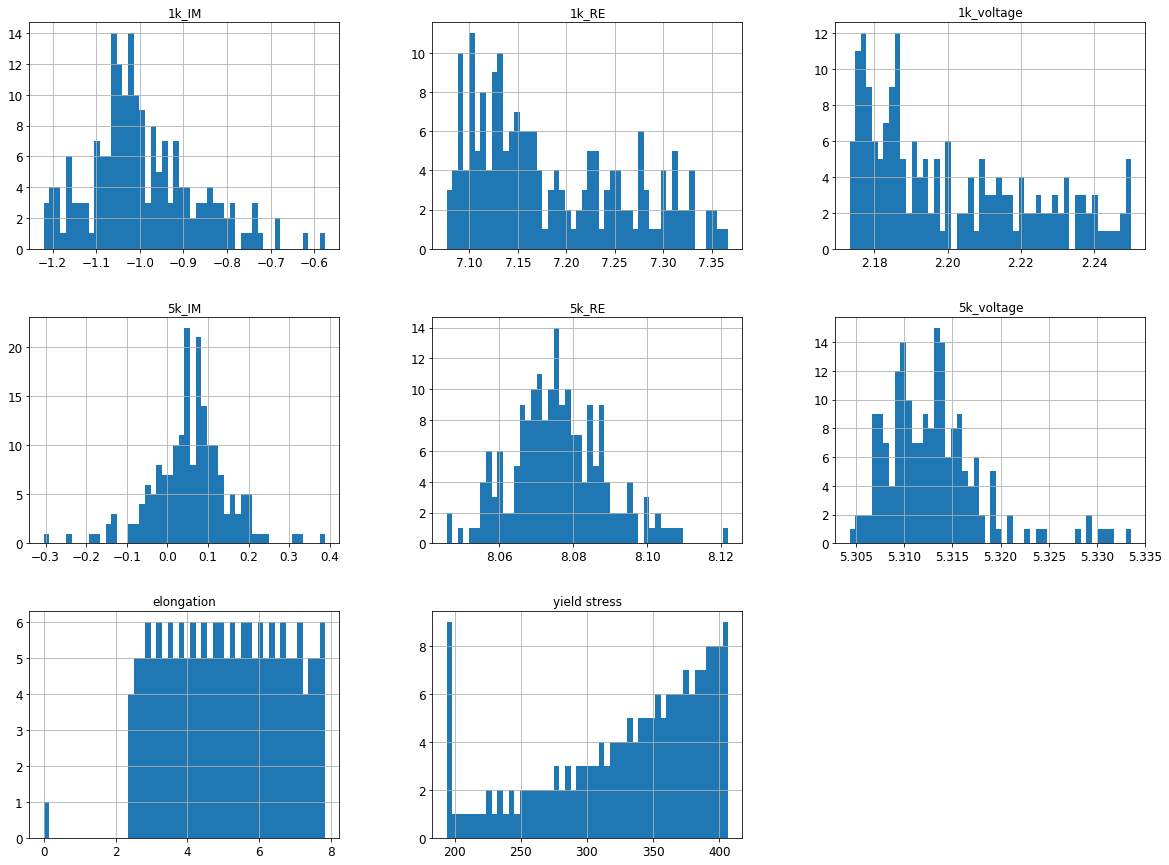

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_voltage","1k_RE", "1k_IM", "5k_voltage", "5k_RE", "5k_IM"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

152

In [12]:
len(X_test)

38

In [0]:
#X_train.to_csv("X_train.csv", mode='w')

Discover and visualize the data to gain insights
===

In [14]:
# Copy the dataset in order not to harm train set
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 8 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_voltage      190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
dtypes: float64(8)
memory usage: 13.4 KB


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 51 to 102
Data columns (total 6 columns):
1k_voltage    152 non-null float64
1k_RE         152 non-null float64
1k_IM         152 non-null float64
5k_voltage    152 non-null float64
5k_RE         152 non-null float64
5k_IM         152 non-null float64
dtypes: float64(6)
memory usage: 8.3 KB


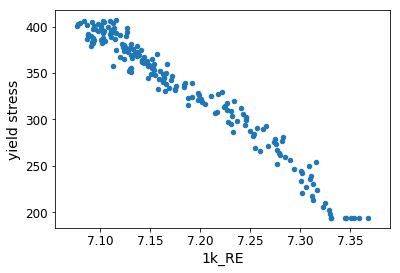

In [16]:
df_copy.plot(kind="scatter", x="1k_RE", y="yield stress")

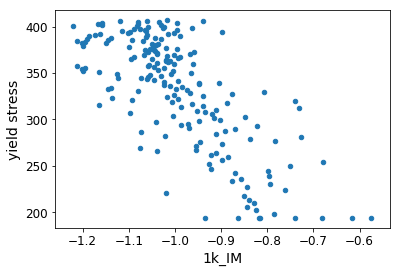

In [17]:
df_copy.plot(kind="scatter", x="1k_IM", y="yield stress")

In [18]:
# Analysis of Standard correlation coefficient
corr_matrix = df_copy.corr()
corr_matrix

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_voltage,5k_RE,5k_IM
yield stress,1.000000,-0.886806,-0.994657,-0.980480,-0.732689,-0.581111,-0.441823,-0.082548
elongation,-0.886806,1.000000,0.897797,0.883247,0.591942,0.294499,0.290037,0.053422
1k_voltage,-0.994657,0.897797,1.000000,0.987401,0.736476,0.557735,0.421207,0.079463
1k_RE,-0.980480,0.883247,0.987401,1.000000,0.816920,0.539938,0.405007,0.075760
1k_IM,-0.732689,0.591942,0.736476,0.816920,1.000000,0.477172,0.310078,0.035729
5k_voltage,-0.581111,0.294499,0.557735,0.539938,0.477172,1.000000,0.596119,0.079823
5k_RE,-0.441823,0.290037,0.421207,0.405007,0.310078,0.596119,1.000000,0.081091
5k_IM,-0.082548,0.053422,0.079463,0.075760,0.035729,0.079823,0.081091,1.000000


In [19]:
# Check what affects the most for the yield stress
corr_matrix["yield stress"].sort_values(ascending=False)


# 1kHz_voltage > 1k_RE > 1k_IM


yield stress    1.000000
5k_IM          -0.082548
5k_RE          -0.441823
5k_voltage     -0.581111
1k_IM          -0.732689
elongation     -0.886806
1k_RE          -0.980480
1k_voltage     -0.994657
Name: yield stress, dtype: float64

In [20]:
corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000
1k_voltage      0.897797
1k_RE           0.883247
1k_IM           0.591942
5k_voltage      0.294499
5k_RE           0.290037
5k_IM           0.053422
yield stress   -0.886806
Name: elongation, dtype: float64

## Feature Scaling

In [21]:
# Feature Scaling => Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_train_std = data_pipeline.fit_transform(X_train)

ys_train = np.array(ys_train)
ys_train =ys_train.reshape(-1, 1)
ys_train = imputer.fit_transform(ys_train)
ys_train_std = data_pipeline.fit_transform(ys_train)

el_train = np.array(el_train)
el_train =el_train.reshape(-1, 1)
el_train = imputer.fit_transform(el_train)
el_train_std = data_pipeline.fit_transform(el_train)

X_test = imputer.fit_transform(X_test)
X_test_std =data_pipeline.fit_transform(X_test)

ys_test = np.array(ys_test)
ys_test = ys_test.reshape(-1, 1)
ys_test = imputer.fit_transform(ys_test)
ys_test_std = data_pipeline.fit_transform(ys_test)

el_test = np.array(el_test)
el_test = el_test.reshape(-1, 1)
el_test = imputer.fit_transform(el_test)
el_test_std = data_pipeline.fit_transform(el_test)


#print(X_train_std)

ys_test_std


array([[ 1.20451104],
       [ 1.24780227],
       [ 0.52677366],
       [-0.17385975],
       [ 0.39560826],
       [-1.74451944],
       [-2.11032816],
       [-1.69025064],
       [ 0.8728661 ],
       [ 0.68318176],
       [ 0.50120669],
       [ 0.31301706],
       [-1.58798893],
       [ 1.10455619],
       [ 0.16493537],
       [ 0.63699534],
       [ 0.43662284],
       [-0.15560221],
       [-0.35878156],
       [-0.70559729],
       [-1.08510976],
       [-1.31649814],
       [ 1.01666267],
       [ 0.34053471],
       [-0.1179416 ],
       [ 0.71827633],
       [ 0.67133709],
       [-1.53925396],
       [-0.62359546],
       [ 0.00440384],
       [ 1.14010928],
       [-0.1366698 ],
       [-2.24669042],
       [ 0.77487445],
       [ 1.1503678 ],
       [ 1.09467335],
       [ 0.0548558 ],
       [ 0.5385152 ]])

In [0]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")

In [0]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")
#np.savetxt("x_train_std.csv", X_train_std, delimiter=",")

In [24]:
X_train_std.shape

(152, 6)

In [25]:
ys_train.shape

(152, 1)

In [0]:
np.random.seed(42)

Select and train a gradient boosting regression model
===

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/GB_Regression/yield_stress_6V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [28]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_std, ys_train_std)
ys_predictions_gb= gb_reg.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
gb_mse = mean_squared_error(ys_train, ys_predictions_gb)
gb_rmse = np.sqrt(gb_mse)
gb_rmse


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.46797964322404056

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
 {'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.001,0.01], 'n_estimators': [100,150,200,300],
  'min_samples_split':[2, 3, 5], 'min_samples_leaf': [1,3,4],
  'max_depth': [3,5,7], 'random_state': [42],  'n_iter_no_change': [5,10,20,40]
    }
  ]

gb_reg = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, ys_train_std)

Output hidden; open in https://colab.research.google.com to view.

In [30]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=5, presort='auto', random_state=42,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [31]:
grid_search.best_params_

{'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'n_iter_no_change': 5,
 'random_state': 42}

In [32]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.9155503162567044 {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': 5, 'random_state': 42}
0.9155503162567044 {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': 10, 'random_state': 42}
0.9155503162567044 {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': 20, 'random_state': 42}
0.9155503162567044 {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': 40, 'random_state': 42}
0.8720694684183061 {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'n_iter_no_change': 5, 'random_state': 42}
0.8720694684183061 {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 3

In [0]:
ys_gb_final_model = grid_search.best_estimator_

In [34]:
"""
ys_gb_final_model = GradientBoostingRegressor(random_state=42)
ys_gb_final_model.fit(X_train_std, ys_train_std)
"""

'\nys_gb_final_model = GradientBoostingRegressor(random_state=42)\nys_gb_final_model.fit(X_train_std, ys_train_std)\n'

In [35]:
ys_gb_train_predictions = ys_gb_final_model.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
ys_gb_train_mse = mean_squared_error(ys_train, ys_gb_train_predictions)
ys_gb_train_rmse = np.sqrt(ys_gb_train_mse)
ys_gb_train_rmse

3.4263936374962682

In [36]:
ys_gb_test_predictions = ys_gb_final_model.predict(X_test_std) * np.std(ys_test) + np.mean(ys_test)
ys_gb_test_mse = mean_squared_error(ys_test,ys_gb_test_predictions)
ys_gb_test_rmse = np.sqrt(ys_gb_test_mse)
ys_gb_test_rmse

3.7622374211041345

## Feature Importances(6 variables)

In [37]:
feature_importances = ys_gb_final_model.feature_importances_
feature_importances

array([9.46334519e-01, 5.08358358e-02, 0.00000000e+00, 2.82868143e-03,
       9.64112365e-07, 0.00000000e+00])

In [38]:
print("Feature importances")
print("1kHz voltage: ", feature_importances[0])
print("1kHz Re: ", feature_importances[1])
print("1kHz Im: ", feature_importances[2])
print("5kHz voltage: ", feature_importances[3])
print("5kHz Re: ", feature_importances[4])
print("5kHz Im: ", feature_importances[5])

Feature importances
1kHz voltage:  0.9463345186596154
1kHz Re:  0.05083583579976151
1kHz Im:  0.0
5kHz voltage:  0.002828681428257861
5kHz Re:  9.64112365408465e-07
5kHz Im:  0.0


## Central Limit Theorem

In [39]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(3456,)
Combinations


In [40]:
mean_train_score = cvres['mean_train_score']
print(mean_train_score)

[-0.82006513 -0.82006513 -0.82006513 ... -1.72970221 -1.68263654
 -1.57937461]


In [41]:
mean_test_score = cvres['mean_test_score']
print(mean_test_score)

[-0.83823238 -0.83823238 -0.83823238 ... -1.73700288 -1.69411905
 -1.60173791]


In [42]:
std_train_score = cvres['std_train_score']
print(std_train_score)

[0.03880559 0.03880559 0.03880559 ... 0.11681322 0.09724643 0.11861216]


In [43]:
std_test_score = cvres['std_test_score']
print(std_test_score)

[0.09627039 0.09627039 0.09627039 ... 0.27467325 0.29811263 0.36237341]


In [44]:
!ls /content/gdrive/My\ Drive/validation/cvscores/Gradient_Boost/yield_stress/GB

ls: cannot access '/content/gdrive/My Drive/validation/cvscores/Gradient_Boost/yield_stress/GB': No such file or directory


In [45]:
with open('/content/gdrive/My Drive/validation/cvscores/Gradient_Boost/yield_stress/GB_6V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")


!cat /content/gdrive/My\ Drive/validation/cvscores/Gradient_Boost/yield_stress/GB_6V.txt



mean_fit_time: [0.03017569 0.02813872 0.02849913 ... 0.12768269 0.14634387 0.17432419]

std_fit_time: [0.00288173 0.00064539 0.00193085 ... 0.03397582 0.03169644 0.0547839 ]

mean_score_time: [0.00052055 0.00046404 0.00049122 ... 0.00064405 0.00065041 0.00076755]

std_score_time: [5.07368081e-05 8.90876224e-06 5.58328373e-05 ... 1.22009813e-04
 1.07307962e-04 2.10172014e-04]

param_learning_rate: [0.001 0.001 0.001 ... 0.01 0.01 0.01]

param_loss: ['ls' 'ls' 'ls' ... 'quantile' 'quantile' 'quantile']

param_max_depth: [3 3 3 ... 7 7 7]

param_min_samples_leaf: [1 1 1 ... 4 4 4]

param_min_samples_split: [2 2 2 ... 5 5 5]

param_n_estimators: [100 100 100 ... 300 300 300]

param_n_iter_no_change: [5 10 20 ... 10 20 40]

param_random_state: [42 42 42 ... 42 42 42]

params: [{'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': 5, 'random_state': 42}, {'learning_rate': 0.001, 'loss': 'ls', 'max_depth

Train data plotting
---

Saving figure TrainPrediction_with_6V_GB_ParamFitted


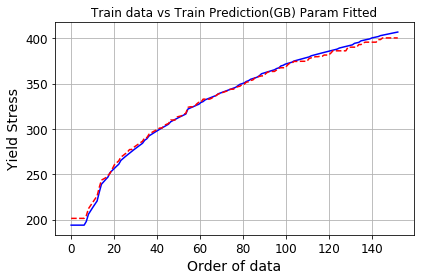

In [46]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
ys_train_sort = np.sort(ys_train, axis=None)
ys_gb_train_predictions_sort= np.sort(ys_gb_train_predictions, axis=None)
plt.plot(xx,ys_train_sort,"b-", xx, ys_gb_train_predictions_sort,"r--")
plt.title("Train data vs Train Prediction(GB) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TrainPrediction_with_6V_GB_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_6V_GB_ParamFitted


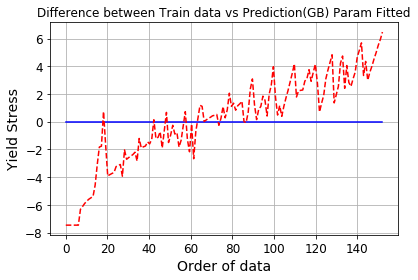

In [47]:
# Difference of train data
difference = ys_train_sort - ys_gb_train_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(GB) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Train_data_vs_Prediction_6V_GB_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_6V_GB_ParamFitted


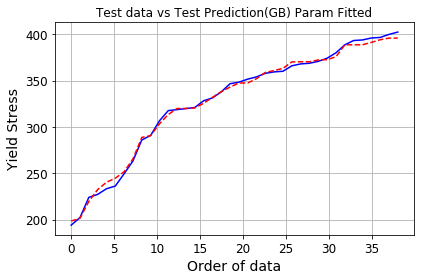

In [48]:
# Difference of train data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
ys_test_sort = np.sort(ys_test, axis=None)
ys_gb_test_predictions_sort= np.sort(ys_gb_test_predictions, axis=None)
plt.plot(xx,ys_test_sort,"b-", xx, ys_gb_test_predictions_sort,"r--")
plt.title("Test data vs Test Prediction(GB) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TestPrediction_with_6V_GB_ParamFitted")

Saving figure Difference_between_Test_data_vs_Prediction_6V_GB_ParamFitted


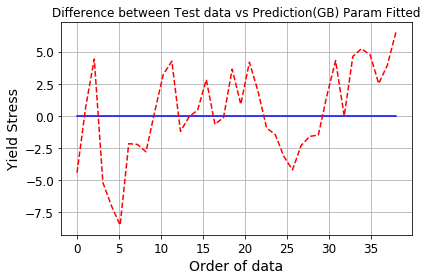

In [49]:
# Difference of train data
difference = ys_test_sort - ys_gb_test_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(GB) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Test_data_vs_Prediction_6V_GB_ParamFitted")


## Extracting files

In [50]:
!ls images/BestHyperParameter/GB_Regression/yield_stress_6V/


Difference_between_Test_data_vs_Prediction_6V_GB_ParamFitted.png
Difference_between_Train_data_vs_Prediction_6V_GB_ParamFitted.png
TestPrediction_with_6V_GB_ParamFitted.png
TrainPrediction_with_6V_GB_ParamFitted.png


In [0]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM fiels to local
files.download('images/BestHyperParameter/GB_Regression/yield_stress_6V/TrainPrediction_with_6V_GB_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/GB_Regression/yield_stress_6V/TestPrediction_with_6V_GB_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/GB_Regression/yield_stress_6V/Difference_between_Train_data_vs_Prediction_6V_GB_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/GB_Regression/yield_stress_6V/Difference_between_Test_data_vs_Prediction_6V_GB_ParamFitted.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/Gradient_Boost/yield_stress/GB_6V.txt')

#### elongation